In [1]:
#Caldara_et_al_2012
import pandas as pd

raw_data = pd.read_csv("/Users/annaevseeva/Downloads/MARL Dynare/Caldara_et_al_2012.csv")
raw_data.head()

,V,y,c,k,invest,l,z,s,E_t_SDF_plus_1,sigma,E_t_R_k,R_f
0,0.682996,0.881549,0.709609,9.520253,0.171940,0.330531,-0.027686,2.805619e+06,0.991887,-3.786849,0.008236,0.008179
1,0.682547,0.870775,0.706022,9.498409,0.164753,0.328909,-0.036150,2.869298e+06,0.992148,-3.744026,0.007972,0.007915
2,0.683236,0.890424,0.711175,9.491489,0.179249,0.332240,-0.020260,2.773245e+06,0.991540,-3.701852,0.008589,0.008532
3,0.682573,0.873345,0.705984,9.472818,0.167362,0.329581,-0.033674,2.864465e+06,0.991997,-3.722239,0.008125,0.008067
4,0.682801,0.880642,0.707599,9.460194,0.173043,0.330901,-0.027665,2.832953e+06,0.991743,-3.742926,0.008383,0.008326


In [2]:
print(raw_data.columns.to_list())

['V', 'y', 'c', 'k', 'invest', 'l', 'z', 's', 'E_t_SDF_plus_1', 'sigma', 'E_t_R_k', 'R_f']


In [3]:
mapping = {
    "V": "Value Function",
    "y": "Output",
    "c": "Consumption",
    "k": "Capital",
    "invest": "Investment",
    "l": "Labor",
    "z": "Technology Shock",
    "s": "Auxiliary Variable For Value Function",
    "E_t_SDF_plus_1": "Expected Stochastic Discount Factor",
    "sigma": "Volatility",
    "E_t_R_k": "Expected Return On Capital",
    "R_f": "Risk-Free Rate"
}

raw_data = raw_data.rename(columns=mapping)

# Вывод обновленного датафрейма
print(raw_data.head())
idx = raw_data.columns.get_loc('Output')
print(idx)

   Value Function    Output  Consumption   Capital  Investment     Labor  \
0        0.682996  0.881549     0.709609  9.520253    0.171940  0.330531   
1        0.682547  0.870775     0.706022  9.498409    0.164753  0.328909   
2        0.683236  0.890424     0.711175  9.491489    0.179249  0.332240   
3        0.682573  0.873345     0.705984  9.472818    0.167362  0.329581   
4        0.682801  0.880642     0.707599  9.460194    0.173043  0.330901   

   Technology Shock  Auxiliary Variable For Value Function  \
0         -0.027686                           2.805619e+06   
1         -0.036150                           2.869298e+06   
2         -0.020260                           2.773245e+06   
3         -0.033674                           2.864465e+06   
4         -0.027665                           2.832953e+06   

   Expected Stochastic Discount Factor  Volatility  \
0                             0.991887   -3.786849   
1                             0.992148   -3.744026   
2       

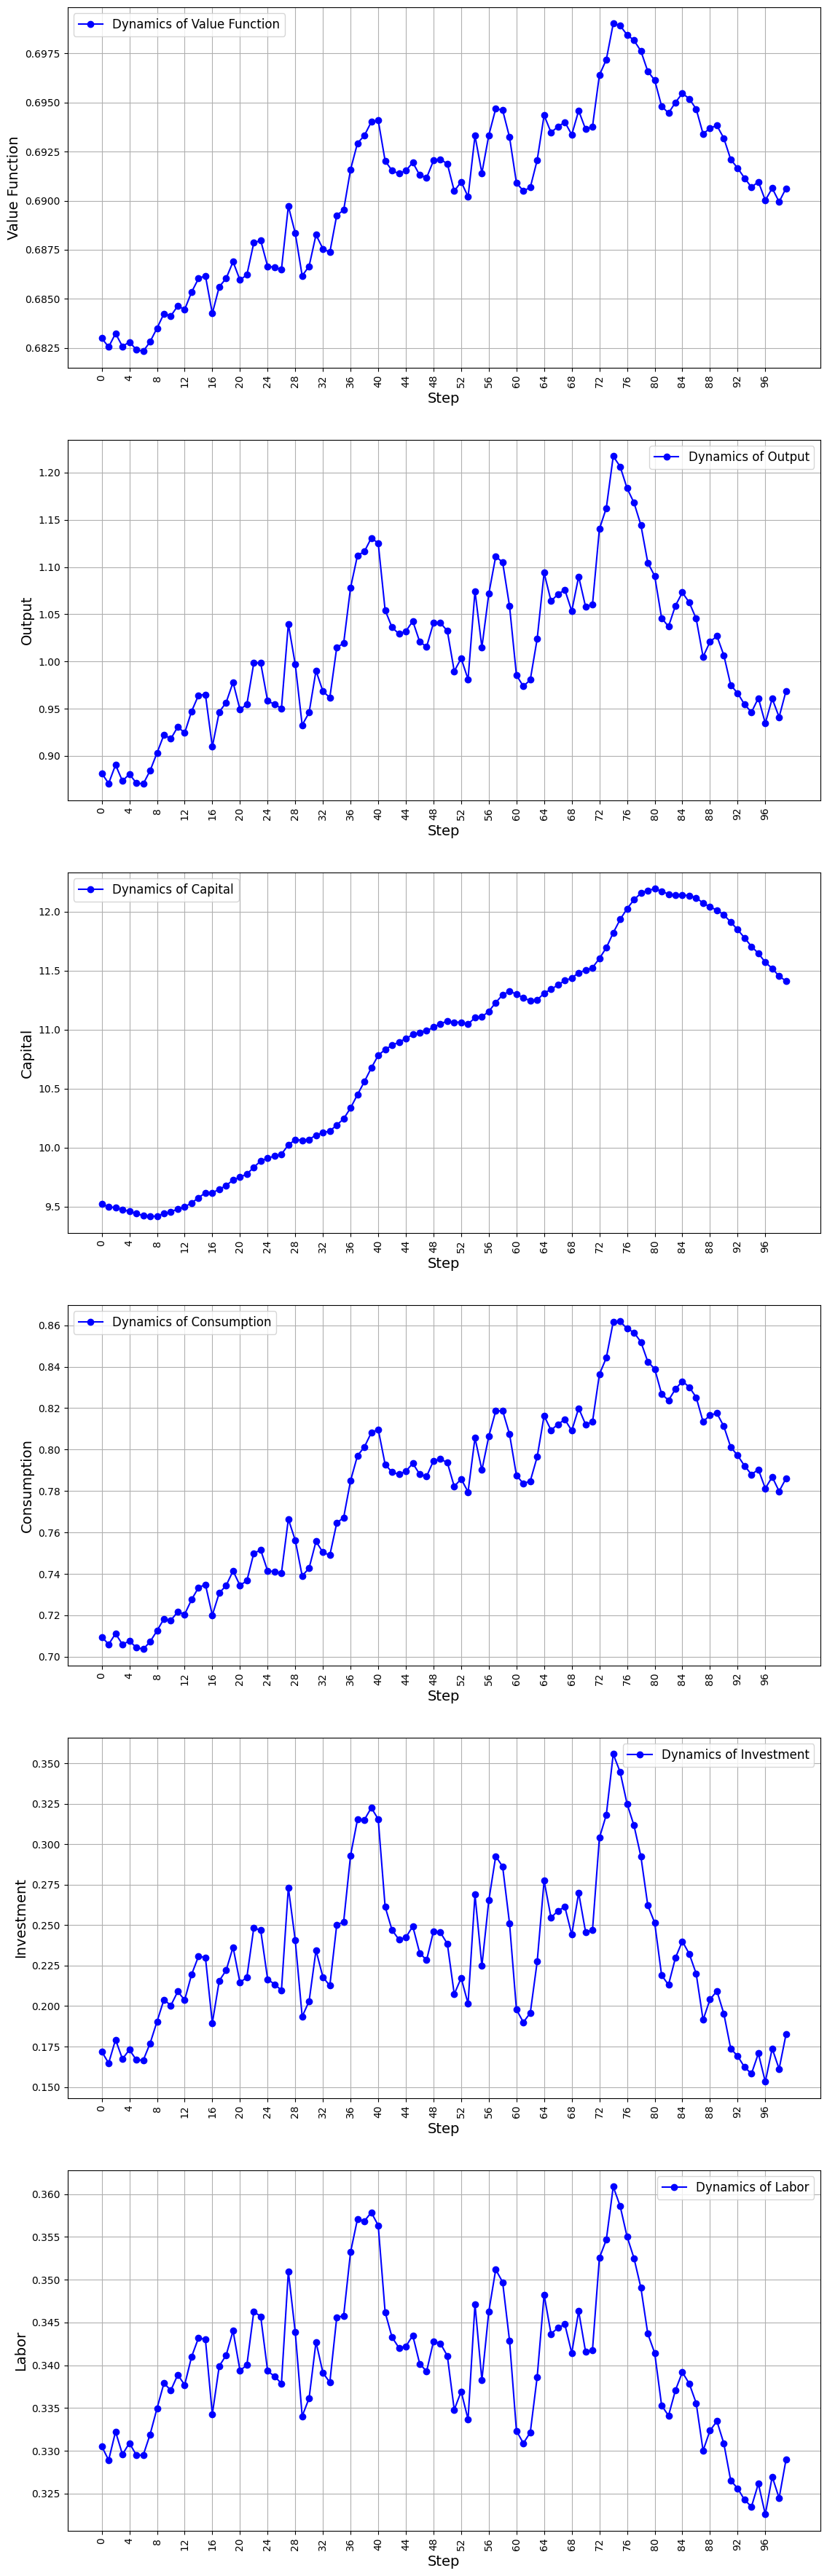

In [4]:
import matplotlib.pyplot as plt
import numpy as np

columns = ["Value Function", "Output", "Capital", "Consumption", "Investment", "Labor"]
# columns = ["y", "c", "k", "invest"]


fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(13.33, 7.5 * len(columns)))

for idx, column in enumerate(columns):
    
    column_values = raw_data[column].to_numpy()
    
    steps = np.arange(len(column_values))
    
    ax = axes[idx]
    
    ax.plot(steps, column_values, marker='o', color='blue', label=f"Dynamics of {column}")
    
    
    ax.legend(fontsize=12)
    ax.set_xlabel("Step", fontsize=14)
    ax.set_ylabel(f"{column}", fontsize=14)
    ax.set_xticks(steps[::4])
    # ax.set_yticks(np.arange(np.min(column_values), np.max(column_values)))
    ax.set_xticklabels(ax.get_xticks(), rotation=90)
    ax.grid(True)